In [35]:
# load the required libraries
import numpy

We need to parse the following information about the molecule from the PSF file:
1. Atom Names
2. Bonds
3. Angles
4. Dihedrals
5. Impropers

In [51]:
# parse the CHARMM PSF file
def parse_CHARMM_PSF(file:str)-> dict[int, int, int, int, int, list[str], list[float], list[tuple[int, int]], list[tuple[int, int, int]], list[tuple[int, int, int, int]], list[tuple[int, int, int, int]]]:
    with open(file) as psfObject:
        # parse in the full PSF file
        psfData =   psfObject.readlines()
    
        # Now find the total number of atoms, bonds, angles and dihedrals
        for lnumber, line in enumerate(psfData):
            if "NATOM" in line:
                nAtoms  =   int(line.split()[0])
                atomloc =   lnumber + 1
            if "NBOND" in line:
                nBonds  =   int(line.split()[0])
                bondloc =   lnumber + 1
            if "NTHETA" in line:
                nAngles =   int(line.split()[0])
                angloc  =   lnumber + 1    
            if "NPHI" in line:
                nDihe   =   int(line.split()[0])
                diheloc =   lnumber + 1
            if "NIMPHI" in line:
                nImp    =   int(line.split()[0])
                imploc  =   lnumber + 1
                
        # Now get the atoms names 
        atomNames   =   [line.split()[4] for line in psfData[atomloc:atomloc + nAtoms]]
        atomCharges =   [float(line.split()[6]) for line in psfData[atomloc:atomloc + nAtoms]]
        
        # Now get the bonds
        bondList    =   psfData[bondloc: bondloc + int(nBonds/4) + 1]
        _bondedAtom =   [int(index) for line in bondList for index in line.split()]
        bondedAtoms =   [(index1 - 1, index2 - 1) for index1, index2 in zip(_bondedAtom[::2], _bondedAtom[1::2])]

        # Now get the angles
        angleList   =   psfData[angloc: angloc + int(nAngles/3) + 1]
        _angleAtom  =   [int(index) for line in angleList for index in line.split()]
        angleAtoms  =   [(index1 - 1, index2 - 1, index3 - 1) for index1, index2, index3 in zip(_angleAtom[::3], _angleAtom[1::3], _angleAtom[2::3])]
        
        # Now get the dihedrals
        diheList    =   psfData[diheloc: diheloc + int(nDihe/2) + 1]
        _diheAtom   =   [int(index) for line in diheList for index in line.split()]
        diheAtoms   =   [(index1 - 1, index2 - 1, index3 - 1, index4 - 1) for index1, index2, index3, index4 in zip(_diheAtom[::4], _diheAtom[1::4], _diheAtom[2::4], _diheAtom[3::4])]       
        
        # Now get the impropers
        impList     =   psfData[imploc : imploc + int(nImp/2) + 1]
        _impAtom    =   [int(index) for line in impList for index in line.split()]
        impAtoms    =   [(index1 - 1, index2 - 1, index3 - 1, index4 - 1) for index1, index2, index3, index4 in zip(_impAtom[::4], _impAtom[1::4], _impAtom[2::4], _impAtom[3::4])]
        
        # return all the data
        packedData  =   dict()
        packedData["nAtoms"]        =   nAtoms
        packedData["nBonds"]        =   nBonds
        packedData["nAngles"]       =   nAngles
        packedData["nDihedral"]     =   nDihe
        packedData["nImproper"]     =   nImp
        packedData["atomNames"]     =   atomNames
        packedData["atomCharge"]    =   atomCharges
        packedData["bondList"]      =   bondedAtoms
        packedData["angleList"]     =   angleAtoms
        packedData["diheList"]      =   diheAtoms
        packedData["impList"]       =   impAtoms
        
    return packedData
            
fullData    =   parse_CHARMM_PSF("./mm_files/init_mm.psf")
print(fullData)

{'nAtoms': 17, 'nBonds': 17, 'nAngles': 25, 'nDihedral': 34, 'nImproper': 2, 'atomNames': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'H1', 'H2', 'C7', 'H3', 'N', 'O1', 'O2', 'H4', 'H5', 'H6', 'H7'], 'bondList': [(0, 1), (0, 2), (1, 3), (2, 4), (4, 5), (5, 3), (4, 6), (5, 7), (3, 8), (0, 9), (1, 10), (11, 8), (8, 12), (12, 13), (2, 14), (10, 15), (10, 16)], 'angleList': [(1, 0, 2), (1, 0, 9), (2, 0, 9), (0, 1, 3), (0, 1, 10), (3, 1, 10), (0, 2, 4), (0, 2, 14), (4, 2, 14), (1, 3, 5), (1, 3, 8), (5, 3, 8), (2, 4, 5), (2, 4, 6), (5, 4, 6), (3, 5, 4), (3, 5, 7), (4, 5, 7), (3, 8, 11), (3, 8, 12), (11, 8, 12), (1, 10, 15), (1, 10, 16), (15, 10, 16), (8, 12, 13)], 'diheList': [(0, 1, 3, 5), (0, 1, 3, 8), (0, 1, 10, 15), (0, 1, 10, 16), (0, 2, 4, 5), (0, 2, 4, 6), (1, 0, 2, 4), (1, 0, 2, 14), (1, 3, 5, 4), (1, 3, 5, 7), (1, 3, 8, 11), (1, 3, 8, 12), (2, 0, 1, 3), (2, 0, 1, 10), (2, 4, 5, 3), (2, 4, 5, 7), (3, 1, 0, 9), (3, 1, 10, 15), (3, 1, 10, 16), (3, 5, 4, 6), (3, 8, 12, 13), (4, 2, 0, 9), (4, 5

In [37]:
# parse the MM CRD file
def parse_CHARMM_CRD(file:str)-> dict[str, list[float]]:
    with open(file) as crdObject:
        # parse the full crd file
        crdData =   crdObject.readlines()
        
        # Now parse the coordinates
        for lnumber, line in enumerate(crdData):
            if "EXT" in line:
                crdloc  =   lnumber + 1
                nAtoms  =   int(line.split()[0])
                break
        
        # get the coordinates
        mmCoords    =   {line.split()[3]:[float(line.split()[4]), float(line.split()[5]), float(line.split()[6])] for line in crdData[crdloc : crdloc + nAtoms]}
    
    return mmCoords

mmCoords    =   parse_CHARMM_CRD("./mm_files/init_mm.crd")

In [44]:
# parse the QM xyz file
def parse_ORCA_XYZ(file:str, atoms:list[str])-> dict[str, list[float]]:
    with open(file) as xyzObject:
        # parse the full xyz file
        xyzData =   xyzObject.readlines()
        
        # Now parse the coordinates
        qmCoords    =   {}
        for atom, coords in zip(atoms, xyzData[2:]):
            qmCoords[atom]  =   [float(coord) for coord in coords.split()[1:]]
        
    return qmCoords

qmCoords    =   parse_ORCA_XYZ("./qm_files/geom/geom_opt.xyz", fullData["atomNames"])

In [ ]:
# Compute the bonds, angles and dihedrals
def compute_GEOM(mmCoords:dict[str, list[float]], qmCoords:dict[str, list[float]], bondList:list[tuple[int, int]], angleList:list[tuple[int, int, int]], diheList:list[tuple[int, int, int, int]], atoms:list[str])->None:
    # first calculate the bonds
    for bond in bondList:
        # get coords for atom 1
        mmAtom1 =   numpy.array(mmCoords[atoms[bond[0]]])
        qmAtom1 =   numpy.array(qmCoords[atoms[bond[0]]])
        
        # get coords for atom 2
        mmAtom2 =   numpy.array(mmCoords[atoms[bond[1]]])
        qmAtom2 =   numpy.array(qmCoords[atoms[bond[1]]])
                
        mm_bondLength   =   numpy.linalg.norm(mmAtom1 - mmAtom2)
        qm_bondLength   =   numpy.linalg.norm(qmAtom1 - qmAtom2)
        
        print("{:10s}{:10s}{:30.3f}{:10.3f}{:10.3f}".format(atoms[bond[0]], atoms[bond[1]], mm_bondLength, qm_bondLength, qm_bondLength - mm_bondLength))
    
    # now calculate the angles
    for angle in angleList:
        # get coords for atom 1
        mmAtom1 =   numpy.array(mmCoords[atoms[angle[0]]])
        qmAtom1 =   numpy.array(qmCoords[atoms[angle[0]]])
        
        # get coords for atom 2
        mmAtom2 =   numpy.array(mmCoords[atoms[angle[1]]])
        qmAtom2 =   numpy.array(qmCoords[atoms[angle[1]]])
        
        # get coords for atom 3
        mmAtom3 =   numpy.array(mmCoords[atoms[angle[2]]])
        qmAtom3 =   numpy.array(qmCoords[atoms[angle[2]]])
        
        # calculate both arms
        mmArm1  =   (mmAtom2 - mmAtom1) / numpy.linalg.norm(mmAtom2 - mmAtom1)
        mmArm2  =   (mmAtom2 - mmAtom3) / numpy.linalg.norm(mmAtom3 - mmAtom1)

        qmArm1  =   (qmAtom2 - qmAtom1) / numpy.linalg.norm(qmAtom2 - qmAtom1)
        qmArm2  =   (qmAtom2 - qmAtom3) / numpy.linalg.norm(qmAtom3 - qmAtom1)
        
        mm_angle    =   numpy.arccos(numpy.dot(mmArm1, mmArm2)) * (180 / numpy.pi)
        qm_angle    =   numpy.arccos(numpy.dot(qmArm1, qmArm2)) * (180 / numpy.pi)
        
        print("{:10s}{:10s}{:10s}{:20.3f}{:10.3f}{:10.3f}".format(atoms[angle[0]], atoms[angle[1]], atoms[angle[2]], mm_angle, qm_angle, qm_angle - mm_angle))
    
    # now calculate the dihedrals
    for dihe in diheList:
        # get coords for atom 1
        mmAtom1 =   numpy.array(mmCoords[atoms[dihe[0]]])
        qmAtom1 =   numpy.array(qmCoords[atoms[dihe[0]]])
        
        # get coords for atom 2
        mmAtom2 =   numpy.array(mmCoords[atoms[dihe[1]]])
        qmAtom2 =   numpy.array(qmCoords[atoms[dihe[1]]])
        
        # get coords for atom 3
        mmAtom3 =   numpy.array(mmCoords[atoms[dihe[2]]])
        qmAtom3 =   numpy.array(qmCoords[atoms[dihe[2]]])
        
        # get coords for atom 4
        mmAtom4 =   numpy.array(mmCoords[atoms[dihe[3]]])
        qmAtom4 =   numpy.array(qmCoords[atoms[dihe[3]]])
        
        # calculate normal for the first three atoms
        mmArm1  =   (mmAtom2 - mmAtom1) / numpy.linalg.norm(mmAtom2 - mmAtom1)
        mmArm2  =   (mmAtom2 - mmAtom3) / numpy.linalg.norm(mmAtom3 - mmAtom1)
        mmNorm1 =   numpy.cross(mmArm1, mmArm2)
        
        qmArm1  =   (qmAtom2 - qmAtom1) / numpy.linalg.norm(qmAtom2 - qmAtom1)
        qmArm2  =   (qmAtom2 - qmAtom3) / numpy.linalg.norm(qmAtom3 - qmAtom1)
        qmNorm1 =   numpy.cross(qmArm1, qmArm2)

        # calculate normal for the last three atoms
        mmArm3  =   (mmAtom3 - mmAtom4) / numpy.linalg.norm(mmAtom3 - mmAtom4)
        mmArm4  =   (mmAtom3 - mmAtom2) / numpy.linalg.norm(mmAtom3 - mmAtom2)
        mmNorm2 =   numpy.cross(mmArm3, mmArm4)
        
        qmArm3  =   (qmAtom3 - qmAtom4) / numpy.linalg.norm(qmAtom3 - qmAtom4)
        qmArm4  =   (qmAtom3 - qmAtom2) / numpy.linalg.norm(qmAtom3 - qmAtom2)
        qmNorm2 =   numpy.cross(qmArm3, qmArm4)
        
        # now calculate the dihedrals
        mm_dihe =   numpy.arccos(numpy.dot(mmNorm1, mmNorm2)) * (180 / numpy.pi)
        qm_dihe =   numpy.arccos(numpy.dot(qmNorm1, qmNorm2)) * (180 / numpy.pi)
        
        print("{:10s}{:10s}{:10s}{:10s}{:10.3f}{:10.3f}{:10.3f}".format(atoms[dihe[0]], atoms[dihe[1]], atoms[dihe[2]], atoms[dihe[3]], mm_dihe, qm_dihe, qm_dihe - mm_dihe))
compute_GEOM(mmCoords, qmCoords, fullData["bondList"], fullData["angleList"], fullData["diheList"], fullData["atomNames"])

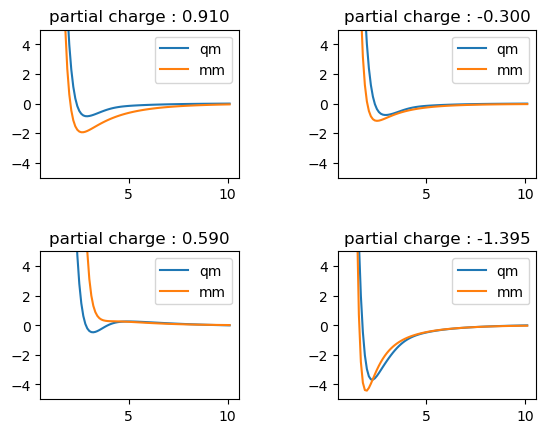

In [3]:
# Now we start the charge fitting
import numpy
import scipy
import os
import matplotlib.pyplot

import scipy.optimize

# first get the qm "training" data
qm_training_data    =   {
    "scan_c2_h_qm" :   numpy.loadtxt("./qm_files/scan_c2_h.qm"),
    "scan_c4_h_qm" :   numpy.loadtxt("./qm_files/scan_c4_h.qm"),
    "scan_c7_o_qm" :   numpy.loadtxt("./qm_files/scan_c7_o.qm"),
    "scan_n_h_qm"  :   numpy.loadtxt("./qm_files/scan_n_h.qm")
}

def charge_optimization(fitting_charges: list[float])-> float:
    # need to set the fitting_atoms
    fitting_atoms   =   ["C2", "C4", "C7", "N"]
    
    # check if the charges sum up to 1
    
    # prepare the temporary str file
    with open("./mm_files/mol.str") as strObject, open("./mm_files/mol_tmp.str", "w") as tmpObject:
        strData =   strObject.readlines()
        
        for lnumber, line in enumerate(strData):
            if line.startswith("ATOM") and not line.split()[1] in fitting_atoms:
                tmpObject.write(line)
            elif line.startswith("ATOM") and line.split()[1] in fitting_atoms:
                _tmpline    =   line.split()
                if _tmpline[1] == "C2":
                    _tmpline[3] =   fitting_charges[0]
                if _tmpline[1] == "C4":
                    _tmpline[3] =   fitting_charges[1]
                if _tmpline[1] == "C7":
                    _tmpline[3] =   fitting_charges[2]
                if _tmpline[1] == "N":
                    _tmpline[3] =   (-0.195) - numpy.sum(fitting_charges)
                    n_charge    =   (-0.195) - numpy.sum(fitting_charges)
                tmpObject.write(line[:18]+f"{_tmpline[3]:7.3f}"+"\n")
            else:
                tmpObject.write(line)
    
    # now run the water scans
    os.system("bash ./mm_files/charge.sh")
    
    
    # parse the mm water scan data
    mm_fitting_data =   {
        "scan_c2_h_mm" :   [],
        "scan_c4_h_mm" :   [],
        "scan_c7_o_mm" :   [],
        "scan_n_h_mm"  :   []
    }

    distances   =   numpy.linspace(1, 10.1, 91)
    
    with open("./mm_files/scan_c2_water_h.ener") as enerObject:
        for line in enerObject:
            energy  =   float(line.split()[1])
            mm_fitting_data["scan_c2_h_mm"].append(energy)
    
    with open("./mm_files/scan_c4_water_h.ener") as enerObject:
        for line in enerObject:
            energy  =   float(line.split()[1])
            mm_fitting_data["scan_c4_h_mm"].append(energy)
    
    with open("./mm_files/scan_c7_water_o.ener") as enerObject:
        for line in enerObject:
            energy  =   float(line.split()[1])
            mm_fitting_data["scan_c7_o_mm"].append(energy)   

    with open("./mm_files/scan_n_water_h.ener") as enerObject:
        for line in enerObject:
            energy  =   float(line.split()[1])
            mm_fitting_data["scan_n_h_mm"].append(energy)
    
    # plot the data
    fig, axes   =   matplotlib.pyplot.subplots(2,2)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    axes[0][0].plot(distances, qm_training_data["scan_c2_h_qm"], label= "qm")
    axes[0][0].plot(distances, mm_fitting_data["scan_c2_h_mm"], label = "mm")
    axes[0][0].set_ylim(-5,5)
    axes[0][0].set_title(f"partial charge : {fitting_charges[0]:0.3f}")
    axes[0][0].legend()
    
    axes[0][1].plot(distances, qm_training_data["scan_c4_h_qm"], label= "qm")
    axes[0][1].plot(distances, mm_fitting_data["scan_c4_h_mm"], label = "mm")
    axes[0][1].set_ylim(-5,5)
    axes[0][1].set_title(f"partial charge : {fitting_charges[1]:0.3f}")
    axes[0][1].legend()

    axes[1][0].plot(distances, qm_training_data["scan_c7_o_qm"], label= "qm")
    axes[1][0].plot(distances, mm_fitting_data["scan_c7_o_mm"], label = "mm")
    axes[1][0].set_ylim(-5,5)
    axes[1][0].set_title(f"partial charge : {fitting_charges[2]:0.3f}")
    axes[1][0].legend()

    axes[1][1].plot(distances, qm_training_data["scan_n_h_qm"], label= "qm")
    axes[1][1].plot(distances, mm_fitting_data["scan_n_h_mm"], label = "mm")
    axes[1][1].set_ylim(-5,5)
    axes[1][1].set_title(f"partial charge : {n_charge:0.3f}")
    axes[1][1].legend()   
    
fitting_charges     =   [0.91, -0.3, 0.58]
charge_optimization(fitting_charges=fitting_charges)
